# Midterm Open Questions
- Why is there systematic trend in the q(z) values? What controls this trend?
- And what would happen to q if random noise was (realistcally) included in this synthetic data set?

In [5]:
# math library
import numpy as np

# plotting library
import matplotlib.pyplot as plt

In [9]:
K = 0.03 
rho = 1300
C = 650
kappa = K/(rho*C)

T0 = -42

a_d = 36
per_d = 88642.663
delta_d = np.sqrt(kappa*per_d/np.pi)

a_y = 11
per_y = 668.5991*per_d
delta_y = np.sqrt(kappa*per_d/np.pi)
q = 0.031

zmin = 0.50
zmax = 4.5
step = (zmax-zmin)/14
z = np.arange(zmin,zmax,step)

tmax = per_y
t = np.arange(0,tmax,per_d/1)

In [10]:
tt,zz = np.meshgrid(t,z)
T1_steady = T0 + q/K*z
T2_steady = T0 + q/K*zz

In [30]:
T2_osc = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y)+\
a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)

T2 = T2_steady + T2_osc

noise = 0.0065*np.random.randn(len(T2),len(T2[0]))
T2 = T2 + noise

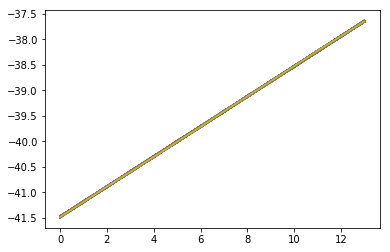

In [32]:
plt.plot()

# Problem 1
1. Make Plots to determine how the systematic trend in q(z) is affected by
    - Changing the amplitude of the daily thermal wave
    - Changing the amplitude of the sesonal thermal wave
    - Increasing the number of temperature measurements made per day
2. At $24 \frac{samples}{day}$, to what degree will such trends affect the inSight mission q measurements?

# Problem 2
1. For our estimates of Martian conditions, make a plot showing how much random noise (as formulated in the Midterm Key) can be added to the system without compromising the q measurements.
    - Determine for what noise amplitude (if any) the measured heat flux departs from the known value by > 20%
    - With estimates of 6.5 milliKelvin variations on their thermistors, is noise likely to be an issure for the inSight mission?